In [1]:
# Imports
import pandas as pd
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
dfCSV = pd.read_csv(url, index_col=['Provincia', 'Fecha'])

In [3]:
# Prepare
dfCSV['pctChange'] = dfCSV.groupby(level='Provincia')['Ingresados'].pct_change() * 100
dfCSV.loc['Huelva', ['Ingresados', 'pctChange']].tail(3)

,Ingresados,pctChange
Fecha,,
07/04/2020,147,2.797203
08/04/2020,154,4.761905
09/04/2020,159,3.246753


Provincia
Almería    AxesSubplot(0.125,0.125;0.775x0.755)
Cádiz      AxesSubplot(0.125,0.125;0.775x0.755)
Córdoba    AxesSubplot(0.125,0.125;0.775x0.755)
Granada    AxesSubplot(0.125,0.125;0.775x0.755)
Huelva     AxesSubplot(0.125,0.125;0.775x0.755)
Jaén       AxesSubplot(0.125,0.125;0.775x0.755)
Málaga     AxesSubplot(0.125,0.125;0.775x0.755)
Sevilla    AxesSubplot(0.125,0.125;0.775x0.755)
Total      AxesSubplot(0.125,0.125;0.775x0.755)
Name: pctChange, dtype: object

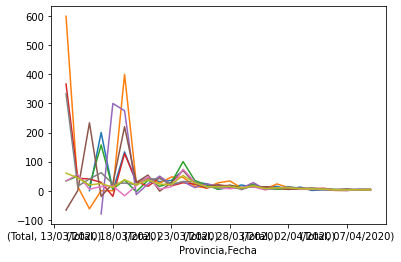

In [4]:
dfCSV.groupby(level='Provincia')['pctChange'].plot()

In [5]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(1)

Provincia  Fecha     
Almería    09/04/2020    4.347826
Cádiz      09/04/2020    4.675325
Córdoba    09/04/2020    1.193317
Granada    09/04/2020    2.488152
Huelva     09/04/2020    3.246753
Jaén       09/04/2020    2.621723
Málaga     09/04/2020    2.477876
Sevilla    09/04/2020    4.545455
Total      09/04/2020    3.047278
Name: pctChange, dtype: float64

In [6]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(2).describe()

count    18.000000
mean      3.239551
std       1.044505
min       1.193317
25%       2.639369
50%       3.064946
75%       4.274383
max       4.761905
Name: pctChange, dtype: float64

Provincia
Almería    AxesSubplot(0.125,0.125;0.775x0.755)
Cádiz      AxesSubplot(0.125,0.125;0.775x0.755)
Córdoba    AxesSubplot(0.125,0.125;0.775x0.755)
Granada    AxesSubplot(0.125,0.125;0.775x0.755)
Huelva     AxesSubplot(0.125,0.125;0.775x0.755)
Jaén       AxesSubplot(0.125,0.125;0.775x0.755)
Málaga     AxesSubplot(0.125,0.125;0.775x0.755)
Sevilla    AxesSubplot(0.125,0.125;0.775x0.755)
Total      AxesSubplot(0.125,0.125;0.775x0.755)
Name: pctChange, dtype: object

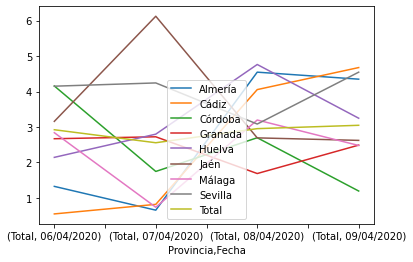

In [7]:
dias = 4
dfCSV[dias*-9:].groupby(level='Provincia')['pctChange'].plot(legend=True)

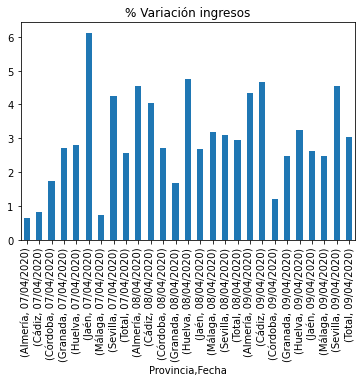

In [8]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(3).plot(kind='bar', title='% Variación ingresos')

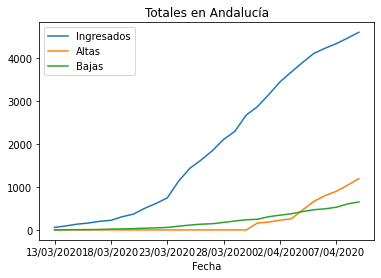

In [9]:
dfCSV.loc['Total'][['Ingresados', 'Altas', 'Bajas']].plot(title='Totales en Andalucía')

In [10]:
provincia_select = 'Total'
data = dfCSV.loc[provincia_select][['Ingresados', 'pctChange']]

In [11]:
title = '% Variación personas ingresadas últimos días en ' + provincia_select
print(title)
data[-3:][['pctChange']]

% Variación personas ingresadas últimos días en Total


,pctChange
Fecha,
07/04/2020,2.555004
08/04/2020,2.952710
09/04/2020,3.047278


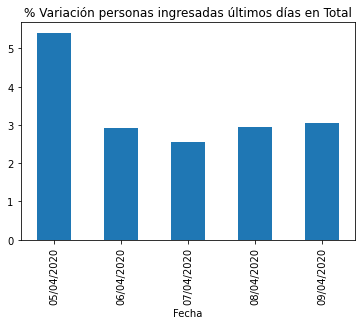

In [12]:
data[-5:]['pctChange'].plot(kind='bar', title=title)

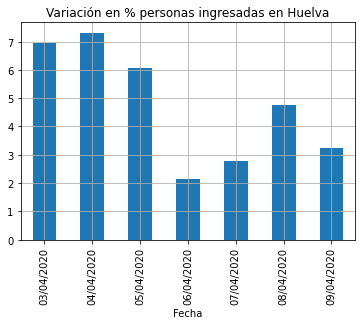

In [13]:
provincia_title = 'Huelva'
lastweek_data = dfCSV.loc[provincia_title][-7:]['pctChange']
lastweek_data.plot(kind='bar', title='Variación en % personas ingresadas en ' + provincia_title, grid=True);

In [14]:
lastweek_data.describe()

count    7.000000
mean     4.754703
std      2.083532
min      2.142857
25%      3.021978
50%      4.761905
75%      6.508564
max      7.317073
Name: pctChange, dtype: float64

In [15]:
lastweek_data

Fecha
03/04/2020    6.956522
04/04/2020    7.317073
05/04/2020    6.060606
06/04/2020    2.142857
07/04/2020    2.797203
08/04/2020    4.761905
09/04/2020    3.246753
Name: pctChange, dtype: float64